Using linear regression find the model parameters. (Intercept and coefficient value) 
Predict the target variable and find the error term. 
How would you convey (interpret) these results in a business context?

#### Loading the dataset and visualizing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [5]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/Assignment_1_Regression/advertising_TV.csv')

In [6]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [7]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [8]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [9]:
print(X.shape)
print(Y.shape)

(200, 1)
(200,)


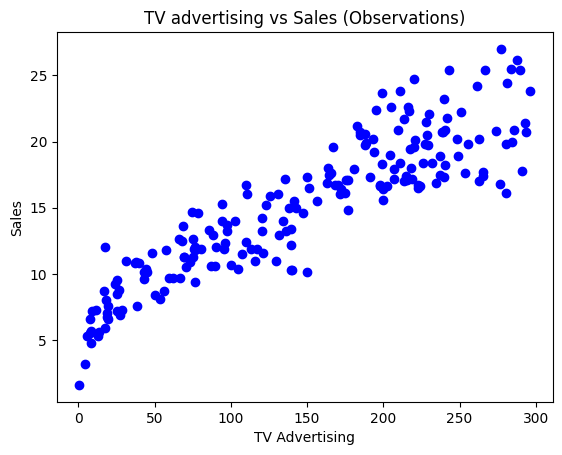

In [10]:
# Visualize the dataset
plt.scatter(X, Y, color = 'blue')
plt.title("TV advertising vs Sales (Observations)")
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.show()

#### Finding the model parameters (Intercept and Coefficient)

In [11]:
# Splitting the model into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state=0)

In [12]:
# fit simple linear regression to the training dataset
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
# The coefficients

# print the parameter theta1
theta_1 = model.coef_
print('Coefficent = theta_1 =', theta_1 )

#print the parameter theta0
theta_0 = model.intercept_
print('Intercept = theta_0 =', theta_0 )

Coefficent = theta_1 = [0.05473199]
Intercept = theta_0 = 7.143822253515246


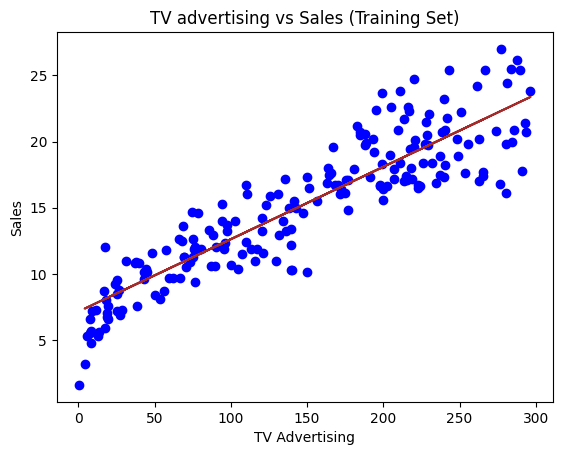

In [14]:
# Visualize the fitted regression line
viz = plt
viz.scatter(X, Y, color = 'blue')
viz.plot(X_train, model.predict(X_train), color = 'brown')
viz.title("TV advertising vs Sales (Training Set)")
viz.xlabel("TV Advertising")
viz.ylabel("Sales")
viz.show()

#### Testing the Model

In [15]:
# Predicting Sales for the X test values
Y_predict = model.predict(X_test)
np.around(Y_predict,1)

array([10.9,  9.9, 12.1, 23. , 16.5, 10.2,  7.6, 20.3,  8.4, 18. , 21.4,
       11.9, 15.7, 17.4, 11.3, 13.7, 21.7,  7.2, 11.2, 18.8, 22.9, 14.8,
       16.7, 14.4, 10.1, 13.9, 16.2, 18.4, 19.4,  8.5, 10.9, 18. , 22.5,
       20.4,  7.9,  8.2, 10.4, 17. , 10.9,  8.5,  9.2,  8.9, 15. , 18.6,
       18.9, 12.8,  7.6,  8.1, 14. , 12.9, 13.2, 19.7, 21. , 17.3,  9.6,
       10.6, 23.2, 16.6, 18.2,  7.5])

In [16]:
Y_test # actual values

array([11.3,  8.4, 12. , 25.4, 16.7,  8.7,  7.2, 18.2,  9.2, 16.6, 24.2,
       10.6, 15.5, 20.6, 11.8, 13.2, 17.4,  1.6, 14.7, 17. , 26.2, 10.3,
       16.1, 12.9,  8.1, 15.2, 17.6, 22.6, 16.6,  8.5, 12.5, 23.7, 16.1,
       21.8,  5.6,  6.7,  9.7, 17.9, 13.6,  7.2, 10.8, 11. , 15. , 20.9,
       17.1, 14. ,  4.8,  8.7, 15.9, 10.4, 12.4, 19.7, 17.6, 20.5, 10.1,
        9.7, 21.4, 16.4, 16.6,  5.5])

#### Performance Measures (MSE and Varience)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('\nThe Mean Squared Error (MSE) = %.2f' % mean_squared_error(Y_test, Y_predict))

# Explained Varience score: 1 is perfect prediction
print('\nVarience score = %.2f' % r2_score(Y_test, Y_predict))


The Mean Squared Error (MSE) = 5.57

Varience score = 0.82


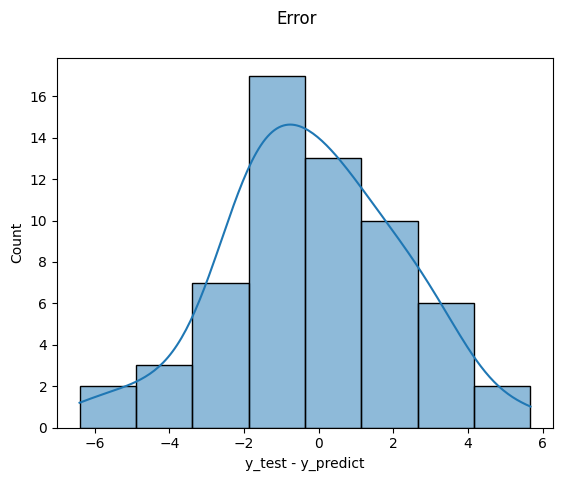

In [18]:
# Check if the error terms are normally distributed (assumption of linear regression)
fig = plt.figure()
res =  (Y_test - Y_predict)
sns.histplot(res, kde=True)
fig.suptitle('Error')                  
plt.xlabel('y_test - y_predict')         
plt.show()

### Interpretation

As you can see the Error values are following normal distibution, which means that for majority of the test data on money spent on TV advertising, the predicted sales values are having error density close to 0 as against the actual sales values.
The varience is 0.82 which is a good score for varience, given the perfect value is 1.

Hence the Linear regression model for predicting the sales value for money spent on advertising that gives least error in the problem space can be denoted by the following:-
if Y = Sales, and X is money spent on TV advertising, then, using the linear regression equation for one variable (here advertising = X)

Y = theta_0 + theta_1.X

Coefficient (theta_1) = [0.05473199]

Intercept (theta_0) = 7.143822253515246

Sales = Intercept + (Coefficient x TV Advertising)

Let's predict the Sales if the money spent on TV advertising is 50 using this model.


In [19]:
Sales = theta_0 + (theta_1 * 50)
print ('\nPredicted Sales for 50 spent on advertising = ', round(float(Sales),1))


Predicted Sales for 50 spent on advertising =  9.9


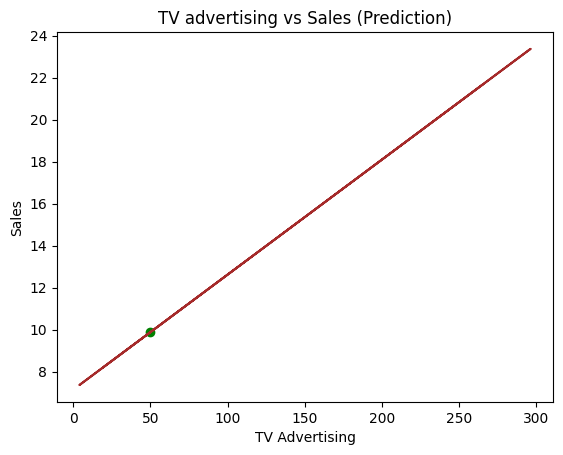

In [20]:
viz1 = viz
viz.scatter(50, Sales, color = 'green')
viz.plot(X_train, model.predict(X_train), color = 'brown')
viz.title("TV advertising vs Sales (Prediction)")
viz.xlabel("TV Advertising")
viz.ylabel("Sales")
viz.show()

Let's predict the Sales if the money spent on TV advertising is 185 using this model.

In [23]:
Sales1 = theta_0 + (theta_1 * 185)
print ('\nPredicted Sales for 185 spent on advertising = ', round(float(Sales1),1))


Predicted Sales for 185 spent on advertising =  17.3


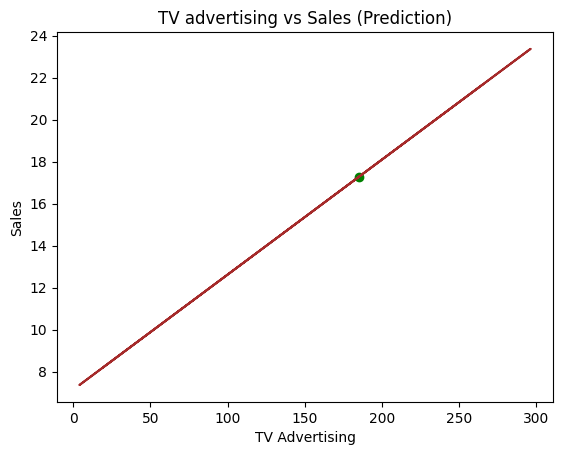

In [24]:
viz1 = viz
viz.scatter(185, Sales1, color = 'green')
viz.plot(X_train, model.predict(X_train), color = 'brown')
viz.title("TV advertising vs Sales (Prediction)")
viz.xlabel("TV Advertising")
viz.ylabel("Sales")
viz.show()

You can provide any new value for TV advertising to check corresponding Sales prediction. 

In [31]:
TV_Adv_new = int(input("\nProvide a positive value for TV advertising: "))
Sales_new = theta_0 + (theta_1 * TV_Adv_new)
print ('\nPredicted Sales = ', round(float(Sales_new),1))



Provide a positive value for TV advertising: 110

Predicted Sales =  13.2


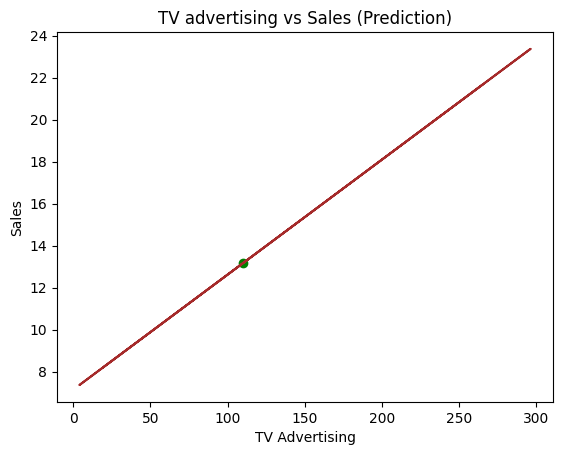

In [34]:
viz1 = viz
viz.scatter(TV_Adv_new, Sales_new, color = 'green')
viz.plot(X_train, model.predict(X_train), color = 'brown')
viz.title("TV advertising vs Sales (Prediction)")
viz.xlabel("TV Advertising")
viz.ylabel("Sales")
viz.show()